# Data Visualisation + Cleaning

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Visualisation

#### Main dataset: Renting Out of Flats 2025

In [3]:
data = pd.read_csv("csvs/RentingOutofFlats2025.csv")
data

,rent_approval_date,town,block,street_name,flat_type,monthly_rent
0,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000
1,2021-01,ANG MO KIO,107,ANG MO KIO AVE 4,3-ROOM,1750
2,2021-01,ANG MO KIO,108,ANG MO KIO AVE 4,3-ROOM,1750
3,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2230
4,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2450
...,...,...,...,...,...,...
151912,2025-02,PUNGGOL,101A,PUNGGOL FIELD,5-ROOM,3000
151913,2025-02,TOA PAYOH,130A,LOR 1 TOA PAYOH,4-ROOM,4000
151914,2025-02,BUKIT MERAH,49,HOY FATT RD,4-ROOM,5000
151915,2025-02,CHOA CHU KANG,810A,CHOA CHU KANG AVE 7,4-ROOM,3200


In [4]:
# separating rent_approval_date into month and year
months = []
years = []
for date in data['rent_approval_date'].to_list():
    years.append(date[:4])
    months.append(date[5:7])
print(len(months), len(years))

151917 151917


In [5]:
# adding to df
data['rent_approval_year'] = years
data['rent_approval_mth'] = months
data

,rent_approval_date,town,block,street_name,flat_type,monthly_rent,rent_approval_year,rent_approval_mth
0,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000,2021,01
1,2021-01,ANG MO KIO,107,ANG MO KIO AVE 4,3-ROOM,1750,2021,01
2,2021-01,ANG MO KIO,108,ANG MO KIO AVE 4,3-ROOM,1750,2021,01
3,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2230,2021,01
4,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2450,2021,01
...,...,...,...,...,...,...,...,...
151912,2025-02,PUNGGOL,101A,PUNGGOL FIELD,5-ROOM,3000,2025,02
151913,2025-02,TOA PAYOH,130A,LOR 1 TOA PAYOH,4-ROOM,4000,2025,02
151914,2025-02,BUKIT MERAH,49,HOY FATT RD,4-ROOM,5000,2025,02
151915,2025-02,CHOA CHU KANG,810A,CHOA CHU KANG AVE 7,4-ROOM,3200,2025,02


In [6]:
# number of years the dataset spans
data['rent_approval_year'].unique()
# the data spans years 2021-2025 (inclusive)

array(['2021', '2022', '2023', '2024', '0001', '2025'], dtype=object)

In [7]:
year_counts = data['rent_approval_year'].value_counts().to_dict()
year_counts.pop('0001')
year_counts

{'2021': 38882, '2023': 36854, '2024': 36506, '2022': 33612, '2025': 6062}

Text(0.5, 1.0, 'Rent Data Dist by Year')

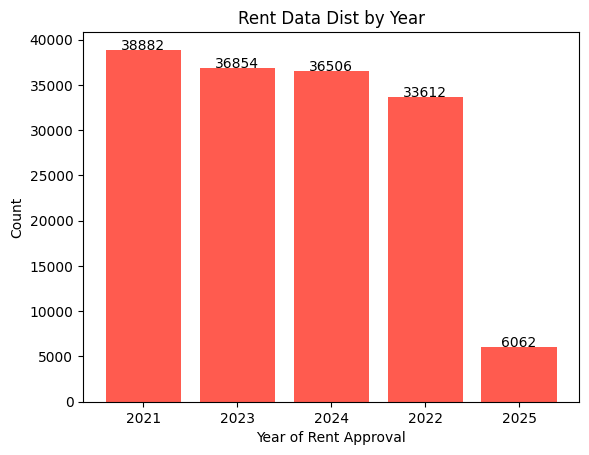

In [8]:
# distribution of data over the years
plt.bar(year_counts.keys(), year_counts.values(), color="#ff5b4f")
plt.xlabel('Year of Rent Approval')
plt.ylabel('Count')
for i, count in enumerate(list(year_counts.values())):
    plt.text(i, count + 20, str(count), ha='center', fontsize=10)
plt.title("Rent Data Dist by Year")

In [9]:
# town-wise distribution
data['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN', 'TENGAH'], dtype=object)

In [10]:
town_counts = data['town'].value_counts().to_dict()
town_counts

{'JURONG WEST': 10565,
 'TAMPINES': 10084,
 'SENGKANG': 9889,
 'BEDOK': 9001,
 'ANG MO KIO': 8372,
 'BUKIT MERAH': 8334,
 'YISHUN': 8027,
 'WOODLANDS': 7685,
 'HOUGANG': 7187,
 'PUNGGOL': 6751,
 'QUEENSTOWN': 6255,
 'TOA PAYOH': 6114,
 'KALLANG/WHAMPOA': 5763,
 'BUKIT BATOK': 5701,
 'CLEMENTI': 5502,
 'CHOA CHU KANG': 5365,
 'GEYLANG': 4589,
 'PASIR RIS': 4128,
 'JURONG EAST': 4054,
 'BUKIT PANJANG': 3774,
 'SEMBAWANG': 3590,
 'SERANGOON': 3411,
 'BISHAN': 3363,
 'CENTRAL': 2306,
 'MARINE PARADE': 1652,
 'BUKIT TIMAH': 450,
 'TENGAH': 5}

Text(0.5, 1.0, 'Data by Town')

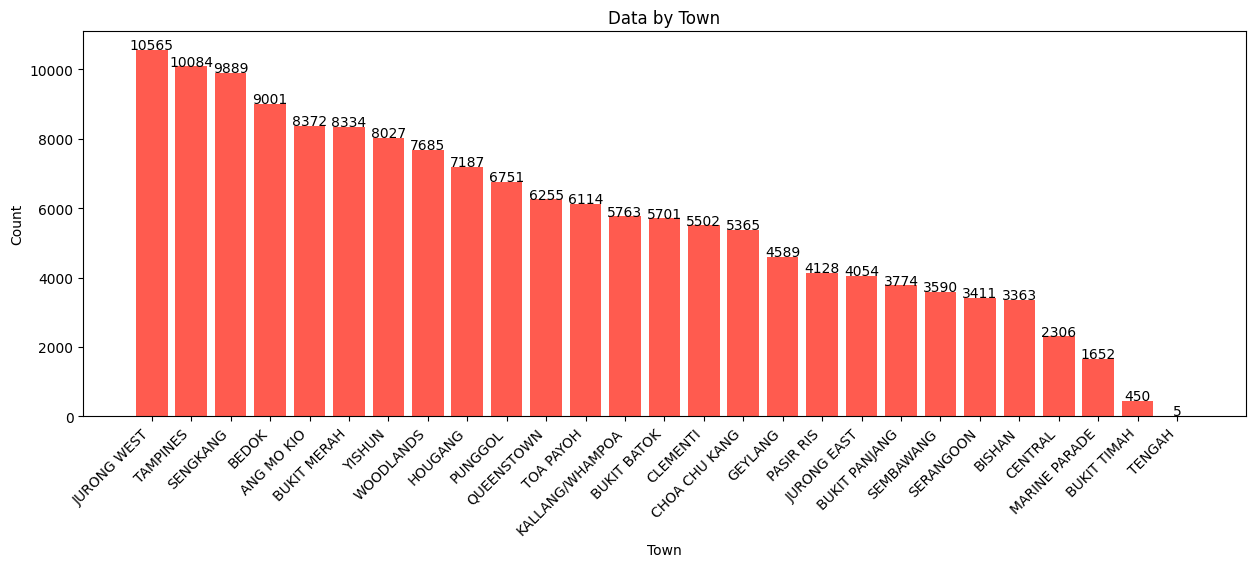

In [11]:
# distribution of towns 
plt.figure(figsize=(15, 5))
plt.bar(town_counts.keys(), town_counts.values(), color="#ff5b4f")
plt.xlabel('Town')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, count in enumerate(list(town_counts.values())):
    plt.text(i, count + 20, str(count), ha='center', fontsize=10)
plt.title("Data by Town")

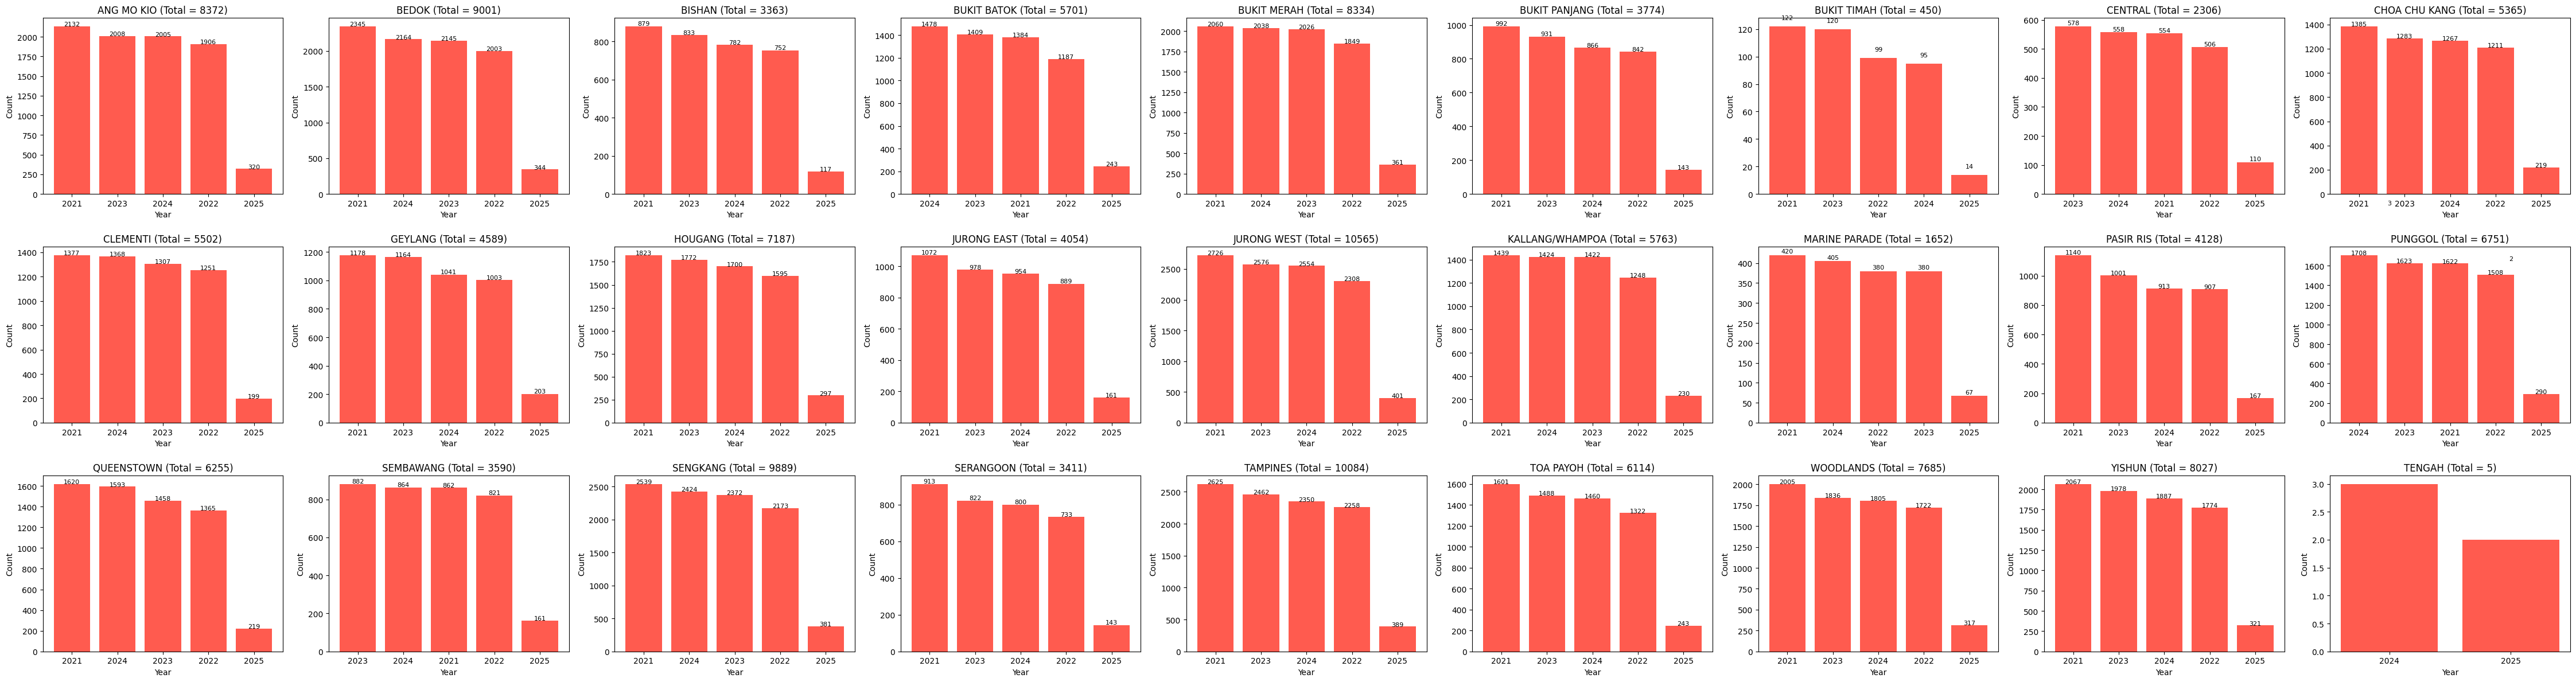

In [12]:
import math

towns = list(data['town'].unique())
cols = 9
rows = 3

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))  
axes = axes.flatten()

for idx, town in enumerate(towns):
    town_df = data[data['town'] == town]
    town_year_counts = town_df['rent_approval_year'].value_counts().to_dict()

    if town == "ANG MO KIO":
        town_year_counts.pop('0001', None)

    ax = axes[idx]
    ax.bar(town_year_counts.keys(), town_year_counts.values(), color="#ff5b4f")

    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.set_title(f"{town} (Total = {len(town_df)})")
    
    for i, (year, count) in enumerate(town_year_counts.items()):
        ax.text(i, count + 5, str(count), ha='center', fontsize=8)

for i in range(len(towns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()

### Cleaning and Combining

In [13]:
data

,rent_approval_date,town,block,street_name,flat_type,monthly_rent,rent_approval_year,rent_approval_mth
0,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000,2021,01
1,2021-01,ANG MO KIO,107,ANG MO KIO AVE 4,3-ROOM,1750,2021,01
2,2021-01,ANG MO KIO,108,ANG MO KIO AVE 4,3-ROOM,1750,2021,01
3,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2230,2021,01
4,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2450,2021,01
...,...,...,...,...,...,...,...,...
151912,2025-02,PUNGGOL,101A,PUNGGOL FIELD,5-ROOM,3000,2025,02
151913,2025-02,TOA PAYOH,130A,LOR 1 TOA PAYOH,4-ROOM,4000,2025,02
151914,2025-02,BUKIT MERAH,49,HOY FATT RD,4-ROOM,5000,2025,02
151915,2025-02,CHOA CHU KANG,810A,CHOA CHU KANG AVE 7,4-ROOM,3200,2025,02


In [18]:
df_property = pd.read_csv('csvs/HDBPropertyInformation.csv')
df_property.rename(columns={'blk_no': 'block', 'street': 'street_name'}, inplace=True)
df_property

,block,street_name,max_floor_lvl,year_completed,residential,commercial,market_hawker,miscellaneous,multistorey_carpark,precinct_pavilion,...,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental
0,1,BEACH RD,16,1970,Y,Y,N,N,N,N,...,138,1,2,0,0,0,0,0,0,0
1,1,BEDOK STH AVE 1,14,1975,Y,N,N,Y,N,N,...,204,0,2,0,0,0,0,0,0,0
2,1,CANTONMENT RD,2,2010,N,Y,N,N,N,N,...,0,0,0,0,0,0,0,0,0,0
3,1,CHAI CHEE RD,15,1982,Y,N,N,N,N,N,...,0,10,92,0,0,0,0,0,0,0
4,1,CHANGI VILLAGE RD,4,1975,Y,Y,N,N,N,N,...,54,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13031,998A,BUANGKOK CRES,18,2018,Y,N,N,N,N,N,...,33,50,0,0,0,0,0,0,0,0
13032,998B,BUANGKOK CRES,17,2018,Y,N,N,N,N,N,...,31,47,0,0,0,0,0,0,0,0
13033,999,BUANGKOK CRES,2,2018,N,N,N,Y,N,Y,...,0,0,0,0,0,0,0,0,0,0
13034,999A,BUANGKOK CRES,18,2018,Y,N,N,N,N,N,...,0,0,0,0,0,0,136,170,0,0


In [19]:
#consistency
data['block'] = data['block'].astype(str).str.strip().str.upper()
data['street_name'] = data['street_name'].astype(str).str.strip().str.upper()

df_property['block'] = df_property['block'].astype(str).str.strip().str.upper()
df_property['street_name'] = df_property['street_name'].astype(str).str.strip().str.upper()

In [20]:
# merge
all_data = pd.merge(data, df_property, on=['block', 'street_name'], how='left')
all_data

,rent_approval_date,town,block,street_name,flat_type,monthly_rent,rent_approval_year,rent_approval_mth,max_floor_lvl,year_completed,...,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental
0,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000,2021,01,10.0,1977.0,...,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01,ANG MO KIO,107,ANG MO KIO AVE 4,3-ROOM,1750,2021,01,11.0,1977.0,...,111.0,18.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01,ANG MO KIO,108,ANG MO KIO AVE 4,3-ROOM,1750,2021,01,12.0,1978.0,...,87.0,31.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2230,2021,01,12.0,1977.0,...,0.0,12.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2450,2021,01,12.0,1977.0,...,0.0,12.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151912,2025-02,PUNGGOL,101A,PUNGGOL FIELD,5-ROOM,3000,2025,02,16.0,2001.0,...,0.0,26.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151913,2025-02,TOA PAYOH,130A,LOR 1 TOA PAYOH,4-ROOM,4000,2025,02,40.0,2017.0,...,77.0,154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151914,2025-02,BUKIT MERAH,49,HOY FATT RD,4-ROOM,5000,2025,02,12.0,1986.0,...,0.0,48.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151915,2025-02,CHOA CHU KANG,810A,CHOA CHU KANG AVE 7,4-ROOM,3200,2025,02,19.0,2016.0,...,0.0,72.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
all_data = all_data[all_data['town'] != 'TENGAH']
all_data

,rent_approval_date,town,block,street_name,flat_type,monthly_rent,rent_approval_year,rent_approval_mth,max_floor_lvl,year_completed,...,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental
0,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000,2021,01,10.0,1977.0,...,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01,ANG MO KIO,107,ANG MO KIO AVE 4,3-ROOM,1750,2021,01,11.0,1977.0,...,111.0,18.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01,ANG MO KIO,108,ANG MO KIO AVE 4,3-ROOM,1750,2021,01,12.0,1978.0,...,87.0,31.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2230,2021,01,12.0,1977.0,...,0.0,12.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2450,2021,01,12.0,1977.0,...,0.0,12.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151912,2025-02,PUNGGOL,101A,PUNGGOL FIELD,5-ROOM,3000,2025,02,16.0,2001.0,...,0.0,26.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151913,2025-02,TOA PAYOH,130A,LOR 1 TOA PAYOH,4-ROOM,4000,2025,02,40.0,2017.0,...,77.0,154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151914,2025-02,BUKIT MERAH,49,HOY FATT RD,4-ROOM,5000,2025,02,12.0,1986.0,...,0.0,48.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151915,2025-02,CHOA CHU KANG,810A,CHOA CHU KANG AVE 7,4-ROOM,3200,2025,02,19.0,2016.0,...,0.0,72.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
all_data['flat_type'].unique()

array(['4-ROOM', '3-ROOM', '5-ROOM', '2-ROOM', 'EXECUTIVE', '1-ROOM'],
      dtype=object)

In [132]:
df_resale_original = pd.read_csv('csvs/hdb_resale_2012_onwards.csv', low_memory=False)
df_resale = df_resale_original[["block", "street_name", "flat_type", "floor_area_sqm", "flat_model"]]
df_sqm = (
    df_resale
    .drop_duplicates(subset=['block','street_name','flat_type', 'floor_area_sqm', 'flat_model'], keep='first')
    [['block','street_name','flat_type', 'floor_area_sqm', 'flat_model']]
)
df_sqm = df_sqm[df_sqm['flat_type'] != 'MULTI-GENERATION'].copy()
df_sqm['flat_type'] = df_sqm['flat_type'].str.replace(' ', '-', regex=False)
df_sqm

,block,street_name,flat_type,floor_area_sqm,flat_model
0,406,ANG MO KIO AVE 10,2-ROOM,44.0,Improved
1,108,ANG MO KIO AVE 4,3-ROOM,67.0,New Generation
2,602,ANG MO KIO AVE 5,3-ROOM,67.0,New Generation
3,465,ANG MO KIO AVE 10,3-ROOM,68.0,New Generation
4,601,ANG MO KIO AVE 5,3-ROOM,67.0,New Generation
...,...,...,...,...,...
263095,143,MARSILING RD,4-ROOM,91.0,New Generation
263097,365,WOODLANDS AVE 5,4-ROOM,107.0,Model A
263211,346,YISHUN AVE 11,4-ROOM,86.0,Simplified
263225,103,YISHUN RING RD,4-ROOM,93.0,New Generation


In [133]:
df_sqm['block'] = df_sqm['block'].astype(str).str.strip().str.upper()
df_sqm['street_name'] = df_sqm['street_name'].astype(str).str.strip().str.upper()

In [134]:
df_sqm = (
    df_sqm
    .drop_duplicates(subset=['block','street_name','flat_type'], keep='first')
    [['block','street_name','flat_type','floor_area_sqm', 'flat_model']]
)
df_sqm

,block,street_name,flat_type,floor_area_sqm,flat_model
0,406,ANG MO KIO AVE 10,2-ROOM,44.0,Improved
1,108,ANG MO KIO AVE 4,3-ROOM,67.0,New Generation
2,602,ANG MO KIO AVE 5,3-ROOM,67.0,New Generation
3,465,ANG MO KIO AVE 10,3-ROOM,68.0,New Generation
4,601,ANG MO KIO AVE 5,3-ROOM,67.0,New Generation
...,...,...,...,...,...
262012,463,ANG MO KIO AVE 10,5-ROOM,136.0,Adjoined flat
262018,611,ANG MO KIO AVE 5,EXECUTIVE,178.0,Adjoined flat
262130,502,BISHAN ST 11,5-ROOM,121.0,Improved
262293,209,PETIR RD,5-ROOM,127.0,Improved


In [135]:
df_sqm['flat_type'].unique()

array(['2-ROOM', '3-ROOM', '4-ROOM', '5-ROOM', 'EXECUTIVE', '1-ROOM'],
      dtype=object)

In [136]:
all_data_v2 = all_data.merge(
    df_sqm,
    on=['block','street_name','flat_type'],
    how='left'
)
all_data_v2

,rent_approval_date,town,block,street_name,flat_type,monthly_rent,rent_approval_year,rent_approval_mth,max_floor_lvl,year_completed,...,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,floor_area_sqm,flat_model
0,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000,2021,01,10.0,1977.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,New Generation
1,2021-01,ANG MO KIO,107,ANG MO KIO AVE 4,3-ROOM,1750,2021,01,11.0,1977.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,New Generation
2,2021-01,ANG MO KIO,108,ANG MO KIO AVE 4,3-ROOM,1750,2021,01,12.0,1978.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,New Generation
3,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2230,2021,01,12.0,1977.0,...,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,Improved
4,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2450,2021,01,12.0,1977.0,...,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,Improved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151907,2025-02,PUNGGOL,101A,PUNGGOL FIELD,5-ROOM,3000,2025,02,16.0,2001.0,...,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,Improved
151908,2025-02,TOA PAYOH,130A,LOR 1 TOA PAYOH,4-ROOM,4000,2025,02,40.0,2017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,Model A
151909,2025-02,BUKIT MERAH,49,HOY FATT RD,4-ROOM,5000,2025,02,12.0,1986.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,Simplified
151910,2025-02,CHOA CHU KANG,810A,CHOA CHU KANG AVE 7,4-ROOM,3200,2025,02,19.0,2016.0,...,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,Model A


In [137]:
# checking and removing null values
all_data_v2.dropna(inplace=True)
all_data_v2

,rent_approval_date,town,block,street_name,flat_type,monthly_rent,rent_approval_year,rent_approval_mth,max_floor_lvl,year_completed,...,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,floor_area_sqm,flat_model
0,2021-01,ANG MO KIO,105,ANG MO KIO AVE 4,4-ROOM,2000,2021,01,10.0,1977.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,New Generation
1,2021-01,ANG MO KIO,107,ANG MO KIO AVE 4,3-ROOM,1750,2021,01,11.0,1977.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,New Generation
2,2021-01,ANG MO KIO,108,ANG MO KIO AVE 4,3-ROOM,1750,2021,01,12.0,1978.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,New Generation
3,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2230,2021,01,12.0,1977.0,...,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,Improved
4,2021-01,ANG MO KIO,111,ANG MO KIO AVE 4,5-ROOM,2450,2021,01,12.0,1977.0,...,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,Improved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151907,2025-02,PUNGGOL,101A,PUNGGOL FIELD,5-ROOM,3000,2025,02,16.0,2001.0,...,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,Improved
151908,2025-02,TOA PAYOH,130A,LOR 1 TOA PAYOH,4-ROOM,4000,2025,02,40.0,2017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,Model A
151909,2025-02,BUKIT MERAH,49,HOY FATT RD,4-ROOM,5000,2025,02,12.0,1986.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,Simplified
151910,2025-02,CHOA CHU KANG,810A,CHOA CHU KANG AVE 7,4-ROOM,3200,2025,02,19.0,2016.0,...,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,Model A


In [138]:
all_data_v2['year_completed'] = all_data_v2['year_completed'].astype(int)
all_data_v2['age_of_bldg'] = 2025 - all_data_v2['year_completed']

In [139]:
all_data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150697 entries, 0 to 151911
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   rent_approval_date     150697 non-null  object 
 1   town                   150697 non-null  object 
 2   block                  150697 non-null  object 
 3   street_name            150697 non-null  object 
 4   flat_type              150697 non-null  object 
 5   monthly_rent           150697 non-null  int64  
 6   rent_approval_year     150697 non-null  object 
 7   rent_approval_mth      150697 non-null  object 
 8   max_floor_lvl          150697 non-null  float64
 9   year_completed         150697 non-null  int64  
 10  residential            150697 non-null  object 
 11  commercial             150697 non-null  object 
 12  market_hawker          150697 non-null  object 
 13  miscellaneous          150697 non-null  object 
 14  multistorey_carpark    150697 non-null  o

In [140]:
# all_data_v2.to_csv('csvs/Rent_Data_Merged.csv', index=False)